## Titanic: Machine Learning from Disaster

#### Aim: To build a predictive model that answers the question: “what sorts of people were more likely to survive?”

### Importing important and merging data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
train=pd.read_csv(r"C:\Users\DELL\Downloads\train.csv",encoding='latin-1')

In [4]:
test=pd.read_csv(r"C:\Users\DELL\Downloads\test.csv",encoding='latin-1')

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Combining and forming test data set

In [7]:
df1 = test

##### Inspecting the dataframe

In [8]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Converting some binary variables (male/female) to 0/1

In [9]:
varlist = ['Sex']
# Defining the map function
def binary_map(x):
    return x.map({"male": 1, "female": 0})

# Applying the function to the housing list
train[varlist] = train[varlist].apply(binary_map)
df1[varlist] = df1[varlist].apply(binary_map)


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [12]:
# Let's see the type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


#### Converting some dummy variables

In [13]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

traindum = pd.get_dummies(train,columns=['Pclass','SibSp','Embarked','Parch'])
testdum=pd.get_dummies(df1,columns=['Pclass','SibSp','Embarked','Parch'])
traindum.info()
testdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Pclass_1     891 non-null    uint8  
 9   Pclass_2     891 non-null    uint8  
 10  Pclass_3     891 non-null    uint8  
 11  SibSp_0      891 non-null    uint8  
 12  SibSp_1      891 non-null    uint8  
 13  SibSp_2      891 non-null    uint8  
 14  SibSp_3      891 non-null    uint8  
 15  SibSp_4      891 non-null    uint8  
 16  SibSp_5      891 non-null    uint8  
 17  SibSp_8      891 non-null    uint8  
 18  Embarked_C   891 non-null    uint8  
 19  Embarked

#### Dropping unnecessary columns created while creating dummy

In [14]:
train_data=traindum.drop(['Parch_0','Embarked_C','SibSp_0','Pclass_1'],1)
test_data=testdum.drop(['Parch_0','Embarked_C','SibSp_0','Pclass_1'],1)

#### Dropping column with a very high missing values

In [15]:
train_data=train_data.drop(['Cabin'],1)
test_data=test_data.drop(['Cabin'],1)

#### Checking for missing value percentage

In [16]:
round(100*(train_data.isnull().sum()/len(train_data.index)), 2)



PassengerId     0.00
Survived        0.00
Name            0.00
Sex             0.00
Age            19.87
Ticket          0.00
Fare            0.00
Pclass_2        0.00
Pclass_3        0.00
SibSp_1         0.00
SibSp_2         0.00
SibSp_3         0.00
SibSp_4         0.00
SibSp_5         0.00
SibSp_8         0.00
Embarked_Q      0.00
Embarked_S      0.00
Parch_1         0.00
Parch_2         0.00
Parch_3         0.00
Parch_4         0.00
Parch_5         0.00
Parch_6         0.00
dtype: float64

#### Checking for outliers in order to apply mean or median to fill missing values

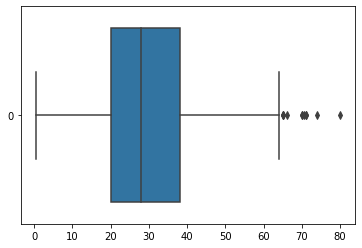

In [17]:
import seaborn as sns

sns.boxplot(data=train_data.Age,orient='h')

##### Here outliers value are not soo far so we will apply median

In [18]:
median1 = train_data['Age'].median()
train_data['Age'].fillna(median1,inplace=True)

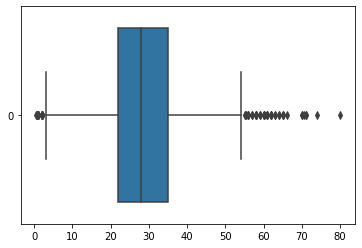

In [19]:
sns.boxplot(data=train_data.Age,orient='h')

#### Checking for missing values in test data

In [20]:
round(100*(test_data.isnull().sum()/len(test_data.index)), 2)

PassengerId     0.00
Name            0.00
Sex             0.00
Age            20.57
Ticket          0.00
Fare            0.24
Pclass_2        0.00
Pclass_3        0.00
SibSp_1         0.00
SibSp_2         0.00
SibSp_3         0.00
SibSp_4         0.00
SibSp_5         0.00
SibSp_8         0.00
Embarked_Q      0.00
Embarked_S      0.00
Parch_1         0.00
Parch_2         0.00
Parch_3         0.00
Parch_4         0.00
Parch_5         0.00
Parch_6         0.00
Parch_9         0.00
dtype: float64

#### Checking for outliers in order to apply mean or median to fill missing values

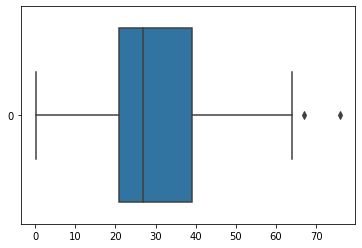

In [21]:
import seaborn as sns

sns.boxplot(data=test_data.Age,orient='h')

##### Here outliers value are not soo far so we will apply median

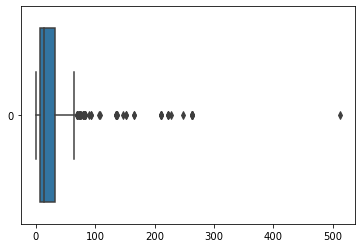

In [22]:
import seaborn as sns

sns.boxplot(data=test_data.Fare,orient='h')

##### Here outliers value are soo far so we will apply mean

In [23]:
median2 = test_data['Age'].median()
test_data['Age'].fillna(median2,inplace=True)
mean1 = test_data['Fare'].mean()
test_data['Fare'].fillna(mean1,inplace=True)

In [24]:
round(100*(test_data.isnull().sum()/len(test_data.index)), 2)

PassengerId    0.0
Name           0.0
Sex            0.0
Age            0.0
Ticket         0.0
Fare           0.0
Pclass_2       0.0
Pclass_3       0.0
SibSp_1        0.0
SibSp_2        0.0
SibSp_3        0.0
SibSp_4        0.0
SibSp_5        0.0
SibSp_8        0.0
Embarked_Q     0.0
Embarked_S     0.0
Parch_1        0.0
Parch_2        0.0
Parch_3        0.0
Parch_4        0.0
Parch_5        0.0
Parch_6        0.0
Parch_9        0.0
dtype: float64

#### Droppinig values with unique values as they do not play any role in predicting

In [25]:
# Putting feature variable to X

x_train=train_data.drop(['PassengerId','Name','Ticket','Survived'],1)
x_test=test_data.drop(['PassengerId','Name','Ticket'],1)

### Splitting data into x and y values

In [26]:
x_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,22.0,7.2500,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,38.0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,7.9250,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,35.0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,35.0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
# Putting response variable to y
    
y_train=train_data['Survived']

In [28]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Feature Scaling

##### Using MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[['Fare','Age']]=scaler.fit_transform(x_train[['Fare','Age']])
x_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0.271174,0.014151,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.472229,0.139136,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.321438,0.015469,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0.434531,0.103644,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0.434531,0.015713,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
x_train

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0.271174,0.014151,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.472229,0.139136,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.321438,0.015469,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0.434531,0.103644,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0.434531,0.015713,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0.334004,0.025374,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
887,0,0.233476,0.058556,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
888,0,0.346569,0.045771,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
889,1,0.321438,0.058556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Scalling test data 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_test[['Fare','Age']]=scaler.fit_transform(x_test[['Fare','Age']])
x_test.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,0.452723,0.015282,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0.617566,0.013663,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0.815377,0.018909,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0.353818,0.016908,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0.287881,0.023984,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [32]:
x_test

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,0.452723,0.015282,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0.617566,0.013663,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0.815377,0.018909,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0.353818,0.016908,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0.287881,0.023984,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0.353818,0.015713,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
414,0,0.512066,0.212559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,1,0.505473,0.014151,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
416,1,0.353818,0.015713,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Dropping column as it has only two values


In [33]:
x_test['Parch_9'].sum()

2

In [34]:
x_test=x_test.drop(['Parch_9'],1)

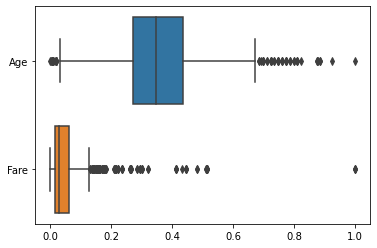

In [35]:
import seaborn as sns
df=x_train[['Age','Fare']]
sns.boxplot(data=df,orient='h')

In [36]:
x_train.isnull().sum()

Sex           0
Age           0
Fare          0
Pclass_2      0
Pclass_3      0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Embarked_Q    0
Embarked_S    0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
dtype: int64

### Checking the Survived Rate


In [37]:

survived = (sum(train_data['Survived'])/len(train_data['Survived'].index))*100
survived


38.38383838383838

### Looking at Correlations


In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

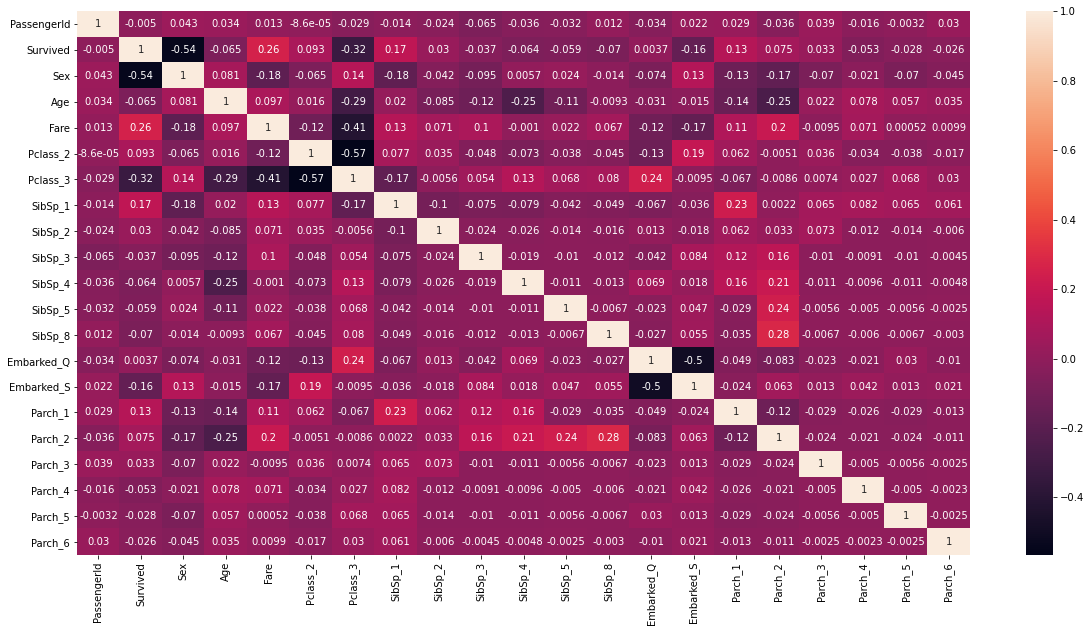

In [39]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(train_data.corr(),annot = True)
plt.show()

#### As we can see no column is very highly correlated so no need to drop any of the column

### Train test split on the train data provided

In [75]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=1500)

### Model Building

In [41]:
import statsmodels.api as sm

In [43]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      871
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -383.13
Date:                Tue, 25 Aug 2020   Deviance:                       766.25
Time:                        23:27:29   Pearson chi2:                     914.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6544      0.491      7.446      0.000       2.692       4.616
Sex           -2.6765      0.203    -13.199      0.000      -3.074      -2.279
Age           -2.8592      0.664     -4.308      0.000      -4.160      -1.558
Fare           1.1805      1.280      0.922      0.356      -1.328       3.689
Pclass_2      -0.9773      0.302     -3.232      0.001      -1.570      -0.385
Pclass_3      -2.0355      0.302     -6.740      0.000      -2.627      -1.444
SibSp_1        0.0989      0.224      0.442      0.659      -0.340       0.538
SibSp_2       -0.2682      0.535     -0.501      0.616      -1.317       0.781
SibSp_3       -2.1921      0.719     -3.049      0.002      -3.601      -0.783
SibSp_4       -1.6752      0.762     -2.199      0.028      -3.168      -0.182
SibSp_5      -22.9674   3.17e+04     -0.001      0.999   -6.22e+04    6.21e+04
SibSp_8      -22.9965   2.51e+04     -0.001      0.999   -4.92e+04    4.91e+04
Embarked_Q     0.0629      0.386      0.163      0.870      -0.693       0.819
Embarked_S    -0.3179      0.244     -1.305      0.192      -0.795       0.159
Parch_1        0.3851      0.289      1.333      0.182      -0.181       0.951
Parch_2        0.0803      0.380      0.212      0.832      -0.664       0.824
Parch_3        0.3022      1.055      0.286      0.775      -1.766       2.371
Parch_4      -22.9255    3.5e+04     -0.001      0.999   -6.85e+04    6.85e+04
Parch_5       -1.2589      1.172     -1.075      0.283      -3.555       1.037
Parch_6      -23.5443   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
==============================================================================
"""

#### Feature Selection Using RFE

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [46]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10) # running RFE with 13 variables as output
rfe = rfe.fit(x_train, y_train)

In [47]:
rfe.support_


array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False])

In [49]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Sex', True, 1),
 ('Age', True, 1),
 ('Fare', True, 1),
 ('Pclass_2', True, 1),
 ('Pclass_3', True, 1),
 ('SibSp_1', False, 6),
 ('SibSp_2', False, 8),
 ('SibSp_3', True, 1),
 ('SibSp_4', True, 1),
 ('SibSp_5', True, 1),
 ('SibSp_8', True, 1),
 ('Embarked_Q', False, 10),
 ('Embarked_S', False, 3),
 ('Parch_1', False, 4),
 ('Parch_2', False, 9),
 ('Parch_3', False, 7),
 ('Parch_4', True, 1),
 ('Parch_5', False, 2),
 ('Parch_6', False, 5)]

In [50]:
col = x_train.columns[rfe.support_]
col

Index(['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_4'],
      dtype='object')

In [51]:
x_train.columns[~rfe.support_]

Index(['SibSp_1', 'SibSp_2', 'Embarked_Q', 'Embarked_S', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_5', 'Parch_6'],
      dtype='object')

#### Assessing the model with StatsModels


In [54]:
X_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -387.34
Date:                Tue, 25 Aug 2020   Deviance:                       774.67
Time:                        23:28:36   Pearson chi2:                     916.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6340      0.442      8.219      0.000       2.767       4.501
Sex           -2.7178      0.195    -13.953      0.000      -3.100      -2.336
Age           -3.1027      0.640     -4.851      0.000      -4.356      -1.849
Fare           1.5389      1.222      1.259      0.208      -0.857       3.935
Pclass_2      -1.0464      0.294     -3.556      0.000      -1.623      -0.470
Pclass_3      -2.0835      0.291     -7.158      0.000      -2.654      -1.513
SibSp_3       -2.2565      0.708     -3.185      0.001      -3.645      -0.868
SibSp_4       -1.7134      0.741     -2.311      0.021      -3.166      -0.260
SibSp_5      -23.1138   3.16e+04     -0.001      0.999   -6.21e+04     6.2e+04
SibSp_8      -23.1166    2.5e+04     -0.001      0.999   -4.89e+04    4.89e+04
Parch_4      -23.0334   3.47e+04     -0.001      0.999    -6.8e+04    6.79e+04
==============================================================================
"""

In [55]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.120577
1    0.915515
2    0.640357
3    0.920214
4    0.076462
5    0.098210
6    0.265601
7    0.031611
8    0.633569
9    0.895528
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12057719, 0.91551467, 0.64035658, 0.92021389, 0.07646153,
       0.09820962, 0.26560066, 0.03161068, 0.63356939, 0.89552762])

#### Creating a dataframe with the actual Survived flag and the predicted probabilities

In [59]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId
0,0,0.120577,0
1,1,0.915515,1
2,1,0.640357,2
3,1,0.920214,3
4,0,0.076462,4


#### Creating new column ‘predicted’ with 1 if Survived_Prob > 0.5 else 0

In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Survived,Survived_Prob,PassengerId,predicted
0,0,0.120577,0,0
1,1,0.915515,1,1
2,1,0.640357,2,1
3,1,0.920214,3,1
4,0,0.076462,4,0


####  Confusion matrix

In [61]:
from sklearn import metrics

In [62]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final.predicted )
print(confusion)

[[478  71]
 [102 240]]


In [63]:
# Predicted    not_Survived    Survived
# Actual
# not_Survived      478             71
# Survived          102             240

In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.8058361391694725


#### Checking VIFs


In [65]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,3.88
0,Sex,2.84
4,Pclass_3,2.52
2,Fare,1.62
3,Pclass_2,1.49
6,SibSp_4,1.09
5,SibSp_3,1.06
7,SibSp_5,1.03
8,SibSp_8,1.03
9,Parch_4,1.02


#### As we can see all our VIF's are  less than (<) 5

#### Metrics beyond simply accuracy

In [67]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7017543859649122

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.8706739526411658

In [70]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12932604735883424


In [71]:
# positive predictive value
print (TP / float(TP+FP))

0.7717041800643086


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

• It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

• The closer the curve follows the left-hand border and then the top border of the ROC space,the more accurate the test.

• The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

In [72]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_Prob, drop_intermediate = False )

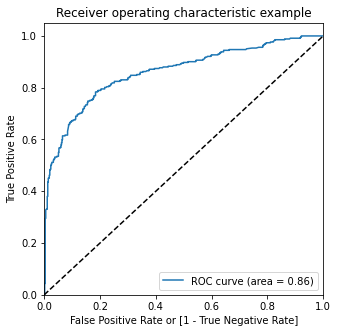

In [74]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [75]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.120577,0,0,1,1,0,0,0,0,0,0,0,0
1,1,0.915515,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.640357,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.920214,3,1,1,1,1,1,1,1,1,1,1,1
4,0,0.076462,4,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.582492  0.944444  0.357013
0.2   0.2  0.723906  0.862573  0.637523
0.3   0.3  0.777778  0.818713  0.752277
0.4   0.4  0.802469  0.783626  0.814208
0.5   0.5  0.805836  0.701754  0.870674
0.6   0.6  0.811448  0.672515  0.897996
0.7   0.7  0.796857  0.532164  0.961749
0.8   0.8  0.771044  0.423977  0.987250
0.9   0.9  0.700337  0.225146  0.996357


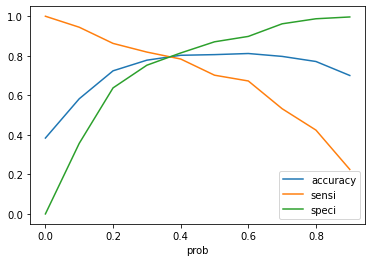

In [77]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.120577,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.915515,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.640357,2,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.920214,3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.076462,4,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7991021324354658

In [80]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[444, 105],
       [ 74, 268]], dtype=int64)

In [81]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.783625730994152

In [83]:
 # Let us calculate specificity
TN / float(TN+FP)

0.8087431693989071

In [84]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1912568306010929


In [85]:
# Positive predictive value
print (TP / float(TP+FP))

0.7184986595174263


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8571428571428571


### Making predictions on the test set made by us


In [87]:
x_test = x_test[['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'SibSp_3', 'SibSp_4',
       'SibSp_8', 'Parch_4', 'Parch_5']]

In [88]:
X_test_sm = sm.add_constant(x_test)

In [89]:
y_test_pred = res.predict(X_test_sm)

In [90]:
y_test_pred[:10]

0    0.072525
1    0.414676
2    0.067172
3    0.096289
4    0.666886
5    0.153742
6    0.587298
7    0.249748
8    0.699014
9    0.124866
dtype: float64

In [91]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [92]:
y_pred_1.head()

,0
0,0.072525
1,0.414676
2,0.067172
3,0.096289
4,0.666886


In [94]:
y_pred_1= y_pred_1.rename(columns={ 0 : 'Survived_prob'})

In [95]:
y_pred_1['Survived'] = y_pred_1.Survived_prob.map(lambda x: 1 if x > 0.42 else 0)

In [96]:
y_pred_f={'PassengerId':test['PassengerId'],'Survived':y_pred_1['Survived']}

In [97]:
df=pd.DataFrame(y_pred_f)

In [98]:
df


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [99]:
df.to_csv('titanic1.csv',index=False)

In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)

NameError: name 'Y_test' is not defined

In [177]:
# Putting CustID to index
y_test_df['PassengerId'] = y_test_df.index

In [178]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
y_pred_final.head()

,Survived,PassengerId,0
0,1,801,0.808040
1,1,1,0.913189
2,0,794,0.097337
3,0,532,0.120544
4,1,318,0.945464


In [181]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob'})

In [182]:
y_pred_final.head()

,Survived,PassengerId,Survived_Prob
0,1,801,0.808040
1,1,1,0.913189
2,0,794,0.097337
3,0,532,0.120544
4,1,318,0.945464


In [183]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.37 else 0)


In [184]:
y_pred_final.head()

,Survived,PassengerId,Survived_Prob,final_predicted
0,1,801,0.808040,1
1,1,1,0.913189,1
2,0,794,0.097337,0
3,0,532,0.120544,0
4,1,318,0.945464,1


In [185]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.8251121076233184

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[124,  15],
       [ 24,  60]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7142857142857143

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.8920863309352518

#### Making predictions on the provided dataset

In [191]:
x_test

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0.452723,0.015282,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.617566,0.013663,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0.815377,0.018909,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0.353818,0.016908,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.287881,0.023984,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0.353818,0.015713,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
414,0,0.512066,0.212559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,1,0.505473,0.014151,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
416,1,0.353818,0.015713,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [192]:
x_test=x_test[['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'SibSp_3', 'SibSp_4',
       'SibSp_8', 'Parch_4', 'Parch_5']]

In [193]:
X_test_sm_final = sm.add_constant(x_test)

In [194]:
y_test_pred_final = res.predict(X_test_sm_final)

In [195]:
y_test_pred_final[:10]

0    0.070859
1    0.438797
2    0.084873
3    0.088429
4    0.637293
5    0.128010
6    0.573321
7    0.235777
8    0.662626
9    0.109593
dtype: float64

In [196]:
# Converting y_pred to a dataframe which is an array
y_pred_1_final = pd.DataFrame(y_test_pred_final)

In [197]:
# Let's see the head
y_pred_1_final.head()

,0
0,0.070859
1,0.438797
2,0.084873
3,0.088429
4,0.637293


In [199]:
y_pred_1_final= y_pred_1_final.rename(columns={ 0 : 'Survived_prob'})

In [201]:
y_pred_1_final['Survived'] = y_pred_1_final.Survived_prob.map(lambda x: 1 if x > 0.42 else 0)

In [202]:
# Converting y_test to dataframe
y_pred_f={'PassengerId':test['PassengerId'],'Survived':y_pred_1_final['Survived']}

In [203]:
df=pd.DataFrame(y_pred_f)

In [204]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [205]:
df.to_csv('titanic.csv',index=False)